In [1]:
import json
import re
from collections import Counter
import pandas as pd

In [2]:
f = open('british_authors.json')
british_athors = json.load(f)
f.close()

f = open('translations.json')
translations = json.load(f)
f.close()

f = open('english_titles.json')
english = json.load(f)
f.close()

In [3]:
len(english)

1299

In [4]:
chronology_eng = Counter()
chronology_translation = Counter()
chronology_other = Counter()

In [5]:
for row in english:
    if re.search( r'\d{4}', str(row['year']) ):
        chronology_eng.update([row['year']])

In [6]:
for row in translations:
    if re.search( r'\d{4}', str(row['year']) ):
        chronology_translation.update([row['year']])

In [7]:
for row in british_athors:
    if re.search( r'\d{4}', str(row['year']) ):
        chronology_other.update([row['year']])

In [8]:
full_stcn = pd.read_csv('total_production.csv')

In [9]:
all_rows = []

for i,row in full_stcn.sort_values(by='year').iterrows():
    if re.search( r'\d{4}', str(row['year']) ):
        year = int(row['year'])
        count = row['nr_books']
        nr_english = chronology_eng.get(row['year'],0)
        nr_translation = chronology_translation.get(row['year'],0)
        nr_other = chronology_other.get(row['year'],0)
        if int(year) < 1801:
            all_rows.append( [ year,count,nr_english,nr_translation,nr_other ] )

In [10]:
df = pd.DataFrame( all_rows , columns = ['year','total','english','translation','other'])

In [11]:
df['percentage_en'] = (df['english'] / df['total'])*100
df['percentage_tr'] = (df['translation'] / df['total'])*100
df['percentage_other'] = (df['other'] / df['total'])*100

In [12]:
df

,year,total,english,translation,other,percentage_en,percentage_tr,percentage_other
0,1473,1,0,0,0,0.000000,0.000000,0.000000
1,1474,17,0,0,0,0.000000,0.000000,0.000000
2,1475,2,0,0,0,0.000000,0.000000,0.000000
3,1477,8,0,0,0,0.000000,0.000000,0.000000
4,1478,9,0,0,0,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...
322,1796,1647,1,13,1,0.060716,0.789314,0.060716
323,1797,1538,3,15,0,0.195059,0.975293,0.000000
324,1798,1292,2,19,1,0.154799,1.470588,0.077399
325,1799,1454,1,18,2,0.068776,1.237964,0.137552


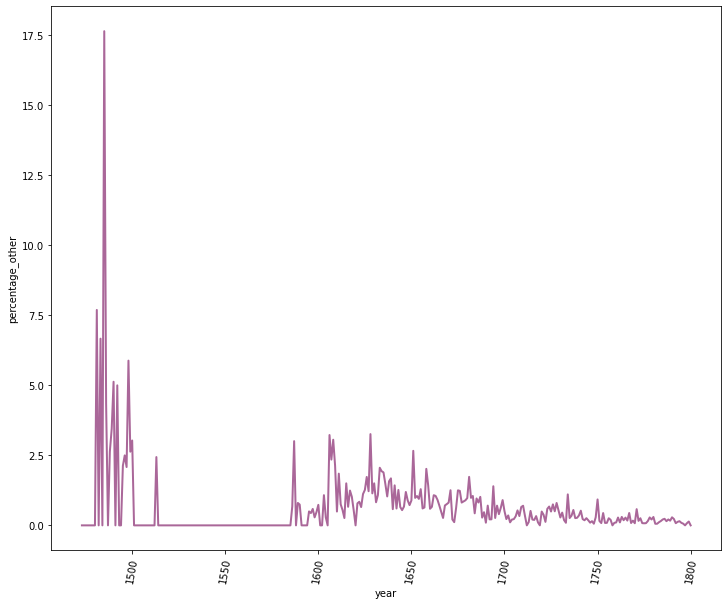

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure( figsize = ( 12, 10))
ax = sns.lineplot(data=df, x="year", y="percentage_other", 
                  color= '#AA6799', linestyle='solid',linewidth=2 )
plt.xticks(rotation= 80)
plt.show()

(array([ 0. ,  2.5,  5. ,  7.5, 10. , 12.5, 15. , 17.5, 20. ]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

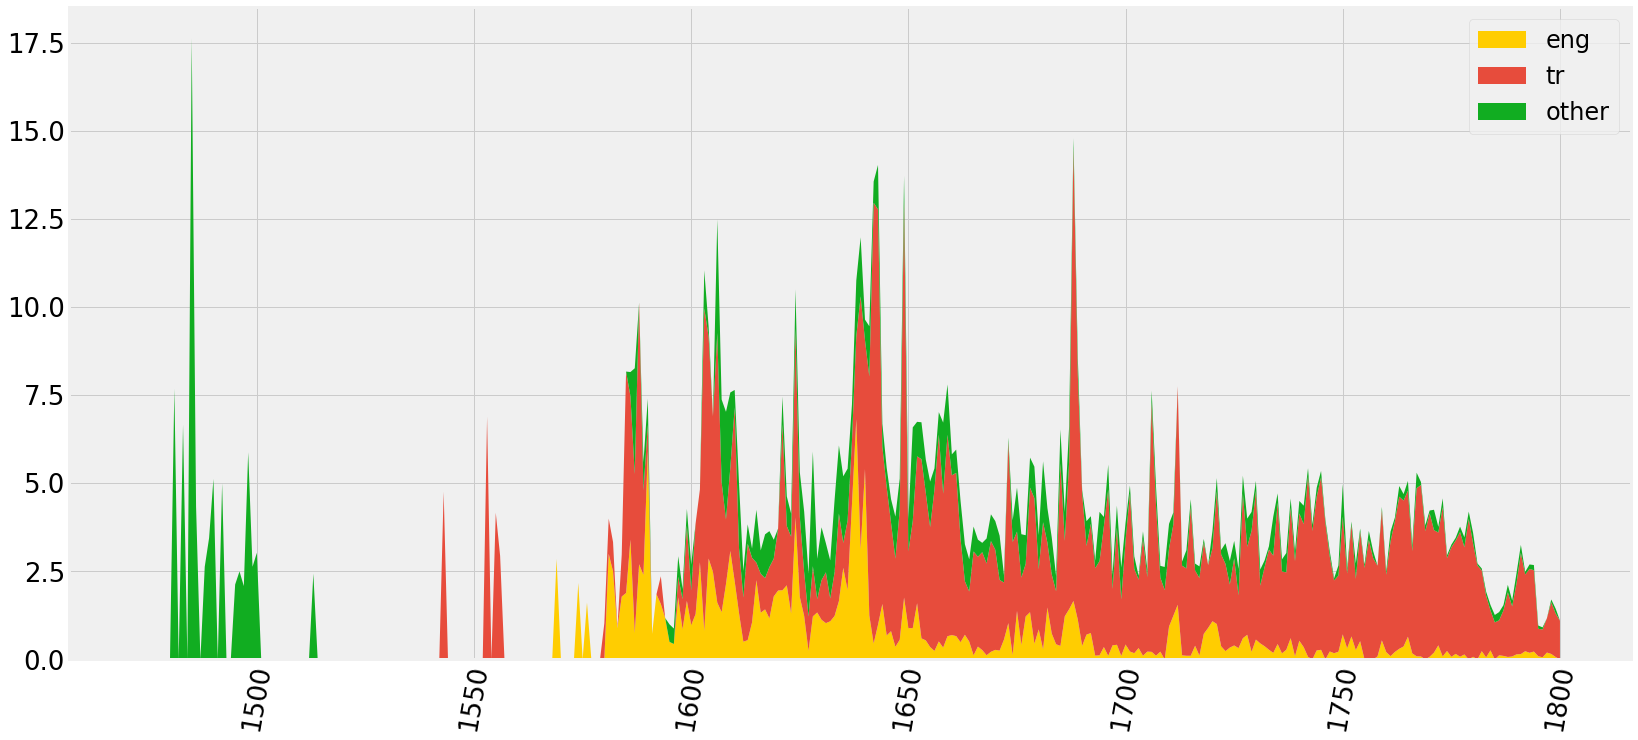

In [14]:
import numpy as np
#import matplotlib.ticker as plticker

plt.figure( figsize = (28,12) )
plt.style.use('fivethirtyeight')

# reset the plot configurations to default
color_map = ["FFCD01", "#e74c3c", "#11ad21","#34495e", "#FFAA88","#0099AA","#9b59b6"]


plt.stackplot( df['year'] , 
    df['percentage_en'],
    df['percentage_tr'] , 
    df['percentage_other'] , labels = ['eng', 'tr', 'other'] , colors = color_map  )

plt.legend( loc='upper right' , prop={ 'size':24} )


#add axis labels



plt.xticks([1500,1550,1600,1650,1700,1750,1800])

plt.xticks(rotation= 80 , fontsize= 26)
plt.yticks(fontsize= 26)

## Subjects

In [15]:
topics = []
df = pd.read_excel('Topics.xlsx')
for i,row in df.iterrows():
    topics.append( row['group'] )
topics = list(set(topics))
print(topics)

['Science', 'Law', 'Theology', 'Biology', 'Medicine', 'Psychology', 'Other', 'Language and literature', 'Geology', 'Arts', 'Political science and economics', 'History', 'Geography']


In [16]:
data = []

for book in translations:
    year = book['year']
    for subject in book['subjects']:
        if re.search( r'\d{4}', year):
            data.append([int(year),subject['group']]) 


for book in british_athors:
    year = book['year']
    for subject in book['subjects']:
        if re.search( r'\d{4}', year):
            data.append([int(year),subject['group']]) 
            

for book in english:
    year = book['year']
    for subject in book['subjects']:
        if re.search( r'\d{4}', str(year) ):
            data.append([int(year),subject['group']]) 
            
            
            
all_rows = []    
for year in range(1450,1801):
    if year % 50 == 0:
        print(year)
    row = []
    row.append(year)
    #print(year)
    for topic in topics:
        #print(topic)
        count = 0
        for subject_year,subject_group in data:
            #print(subject_year,year)
            if int(subject_year) == int(year) and subject_group == topic:
                count += 1
        row.append(count)
    all_rows.append(row)
        
        

1450
1500
1550
1600
1650
1700
1750
1800


In [17]:
df = pd.DataFrame(all_rows, columns = ['year'] + topics)
df.shape

(351, 14)

In [18]:
df['total']= df['History'] + df['Language and literature'] +  df['Other'] +  df['Psychology'] +  df['Arts'] +  df['Medicine'] +  df['Science'] +  df['Law'] +  df['Political science and economics'] +  df['Geology'] +  df['Theology'] +  df['Geography'] +  df['Biology']

In [19]:
for topic in topics:
    column_name = topic + '_percentage'
    print(column_name)
    df[column_name] = (df[topic]/df['total'])*100

Science_percentage
Law_percentage
Theology_percentage
Biology_percentage
Medicine_percentage
Psychology_percentage
Other_percentage
Language and literature_percentage
Geology_percentage
Arts_percentage
Political science and economics_percentage
History_percentage
Geography_percentage


In [20]:
topics

['Science',
 'Law',
 'Theology',
 'Biology',
 'Medicine',
 'Psychology',
 'Other',
 'Language and literature',
 'Geology',
 'Arts',
 'Political science and economics',
 'History',
 'Geography']

(array([  0.,  20.,  40.,  60.,  80., 100., 120.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

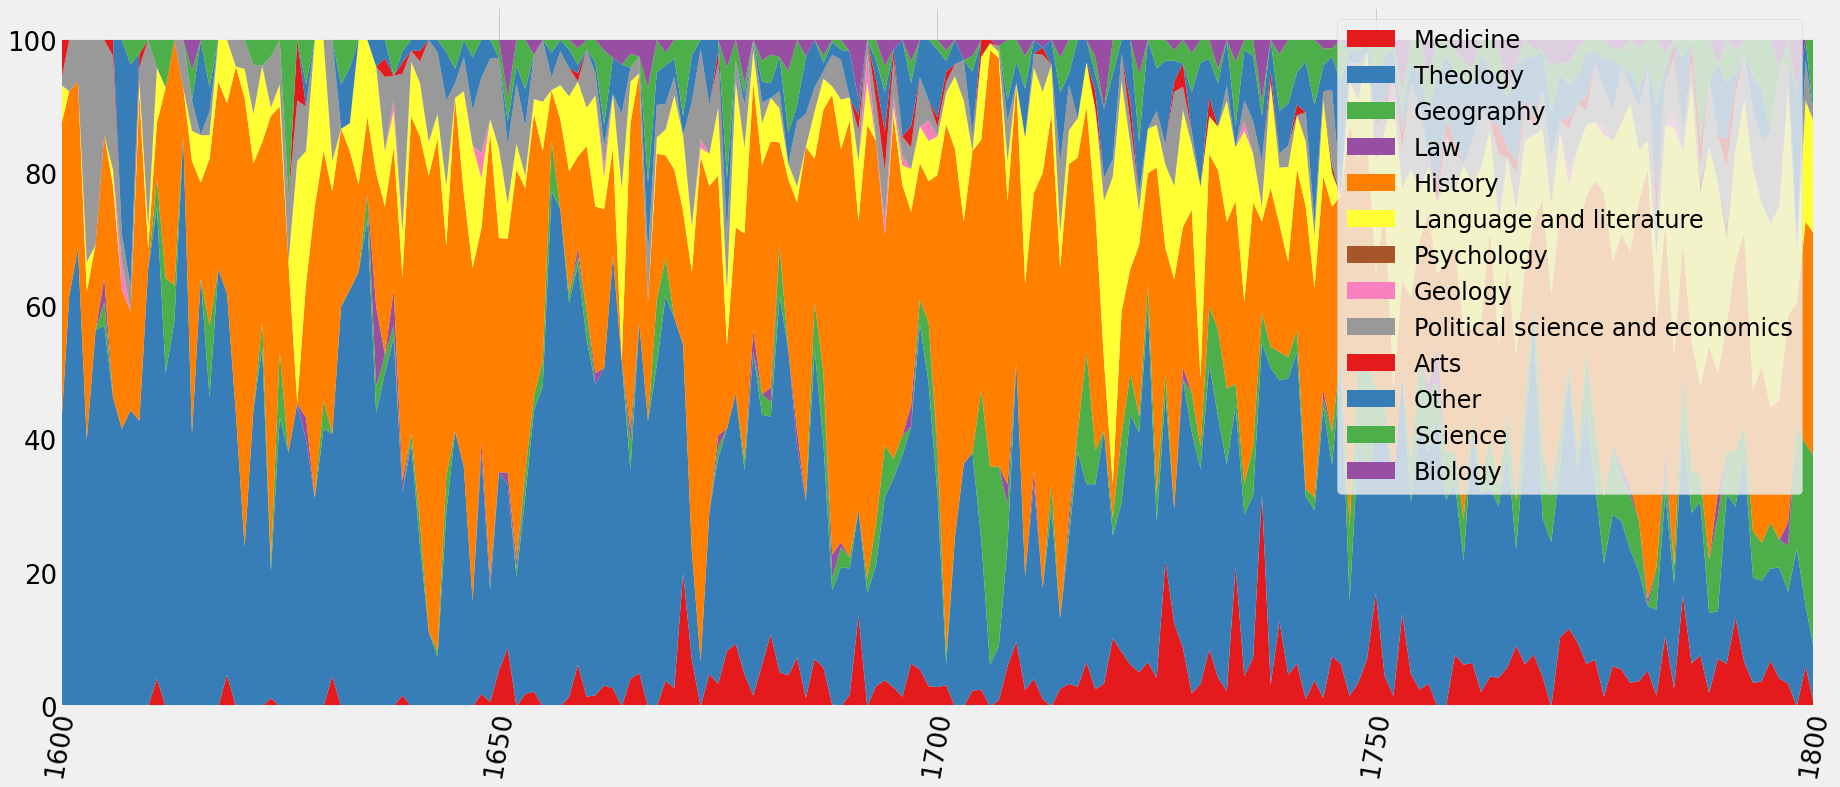

In [21]:


plt.figure( figsize = (28,12) )
plt.style.use('fivethirtyeight')

# reset the plot configurations to default
color_map = ["FFCD01", "#e74c3c", "#11ad21","#34495e", "#FFAA88","#0099AA","#9b59b6"]
color_map = sns.color_palette("Set1",13)

plt.stackplot( df['year'] , 
              
             df['Medicine_percentage'],
              df['Theology_percentage'],
              df['Geography_percentage'],
              df['Law_percentage'],
              df['History_percentage'],
              df['Language and literature_percentage'],
              df['Psychology_percentage'],
              df['Geology_percentage'],
              df['Political science and economics_percentage'],
              df['Arts_percentage'],
              df['Other_percentage'],
              df['Science_percentage'],
              df['Biology_percentage'] , labels = ['Medicine',
 'Theology',
 'Geography',
 'Law',
 'History',
 'Language and literature',
 'Psychology',
 'Geology',
 'Political science and economics',
 'Arts',
 'Other',
 'Science',
 'Biology'] , colors = color_map  )

plt.legend( loc='upper right' , prop={ 'size':24} )


#add axis labels
plt.xlim(1600,1800)


plt.xticks([1600,1650,1700,1750,1800])

plt.xticks(rotation= 80 , fontsize= 26)
plt.yticks(fontsize= 26)

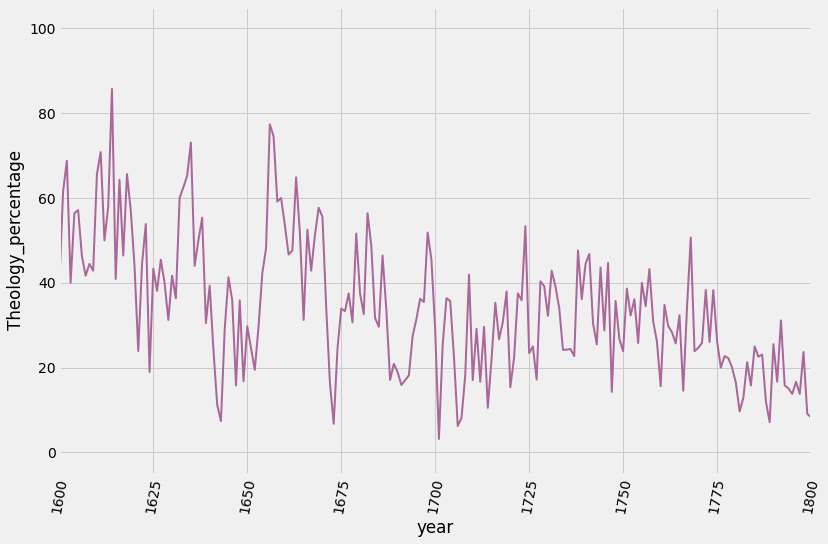

In [22]:


fig = plt.figure( figsize = ( 12, 8))
plt.xlim(1590, 180)
ax = sns.lineplot(data=df, x="year", y="Theology_percentage", 
                  color= '#AA6799', linestyle='solid',linewidth=2 )
plt.xticks(rotation= 80)

ax.set_xlim(1600, 1800)

plt.show()

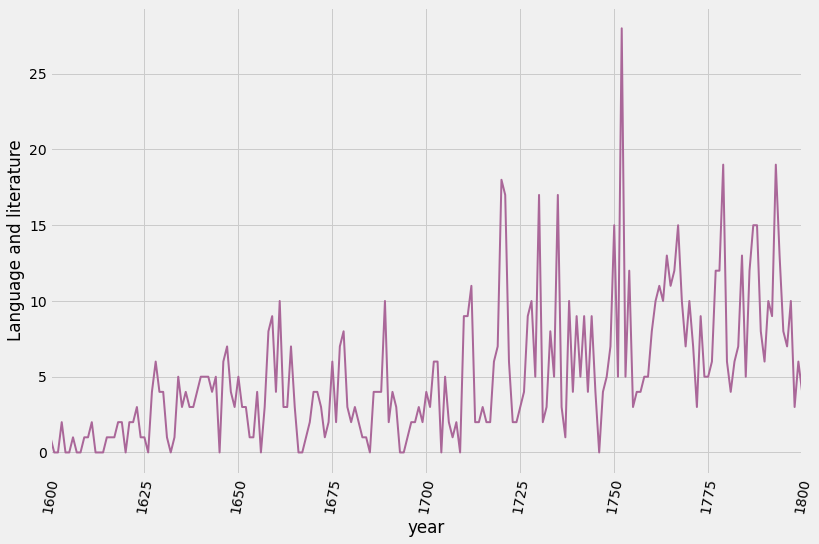

In [23]:

fig = plt.figure( figsize = ( 12, 8))
plt.xlim(1590, 180)
ax = sns.lineplot(data=df, x="year", y="Language and literature", 
                  color= '#AA6799', linestyle='solid',linewidth=2 )
plt.xticks(rotation= 80)

ax.set_xlim(1600, 1800)

plt.show()

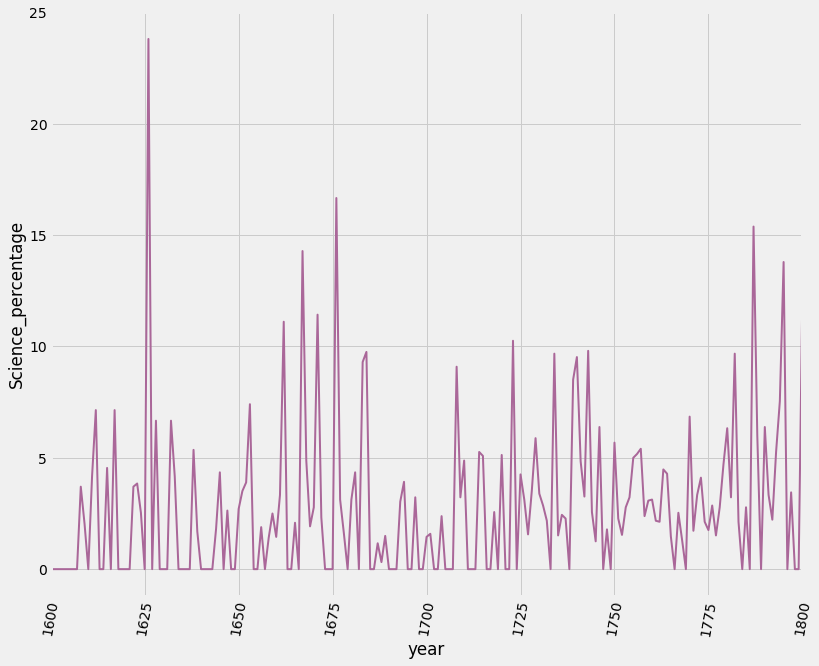

In [24]:

fig = plt.figure( figsize = ( 12, 10))
plt.xlim(1590, 180)
ax = sns.lineplot(data=df, x="year", y="Science_percentage", 
                  color= '#AA6799', linestyle='solid',linewidth=2 )
plt.xticks(rotation= 80)

ax.set_xlim(1600, 1800)

plt.show()